In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

# Define the input size for ResNet101V2
IMG_SIZE = (224, 224)
BATCH_SIZE = 512

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Use ResNet101V2's preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)

# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test',  # Path to the test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [ ]:
categories = ['NORMAL', 'PNEUMONIA']

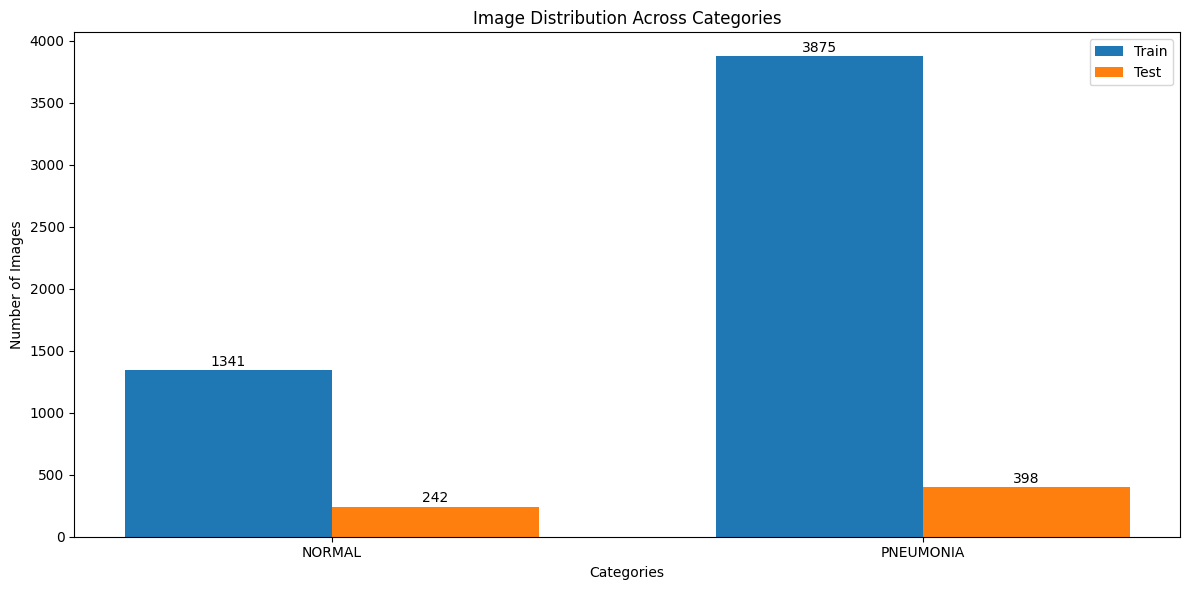

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
test_data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Define your categories
categories = ['NORMAL', 'PNEUMONIA']  # Use your actual categories

# Initialize counts for each category
train_counts = {category: 0 for category in categories}
test_counts = {category: 0 for category in categories}

# Count images in train dataset
for category in categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

# Count images in test dataset
for category in categories:
    category_path = os.path.join(test_data_path, category)
    test_counts[category] = len(os.listdir(category_path))

df = pd.DataFrame({
    'Category': categories,  # Use your actual categories
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(categories))  # Use your actual categories
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Categories')  # Update the x-axis label
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Categories')  # Update the title
ax.set_xticks(x)
ax.set_xticklabels(categories)  # Use your actual categories
ax.legend()

# Add count labels
for index, row in df.iterrows():
    ax.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    ax.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

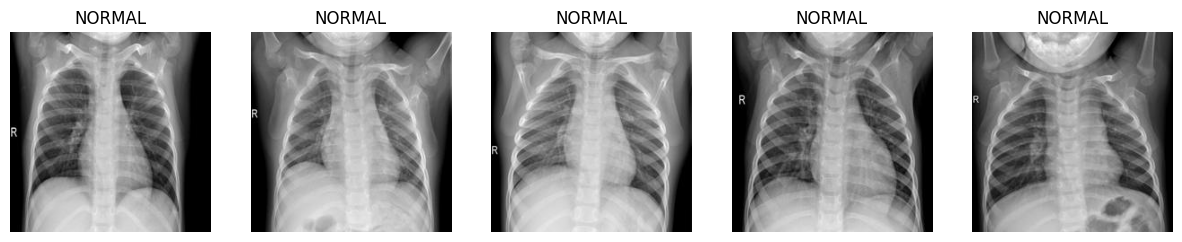

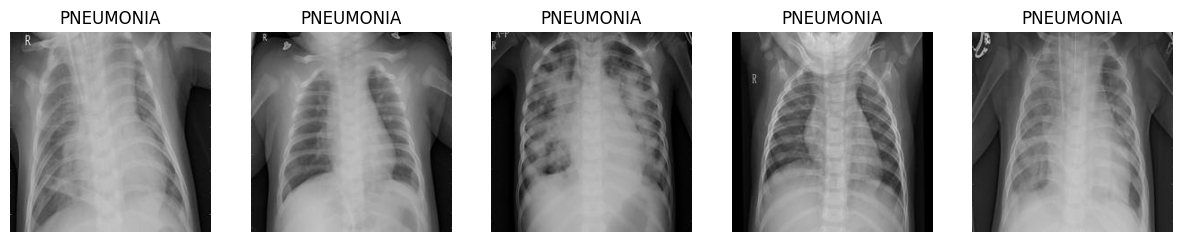

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        # Open image using PIL
        img = Image.open(img_path)

        # Convert to RGB explicitly
        img = img.convert('RGB')

        axes[i].imshow(img)  # Display using PIL's image data
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and categories
data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
categories = ['NORMAL', 'PNEUMONIA']

for category in categories:
    category_path = os.path.join(data_path, category)
    all_img_files = os.listdir(category_path)
    random_img_files = random.sample(all_img_files, 5)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]
    plot_sample_images(img_paths, [category] * len(img_paths))

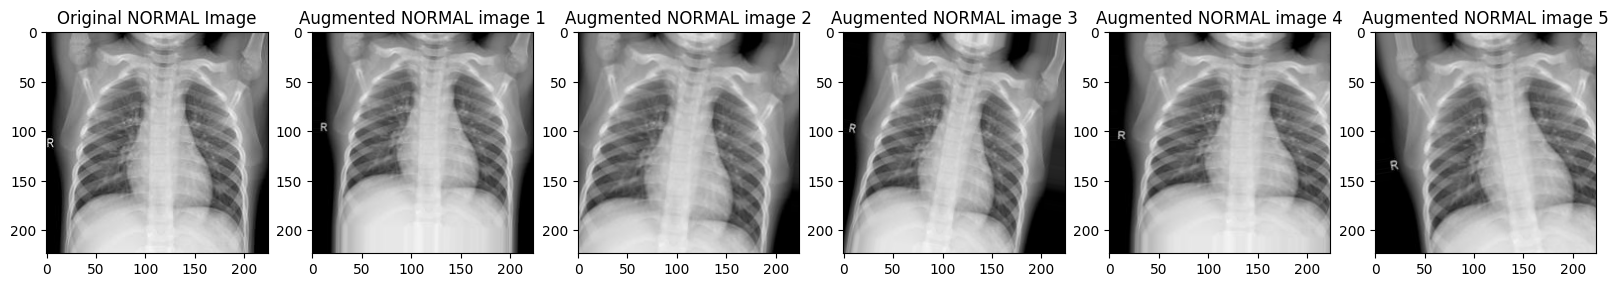

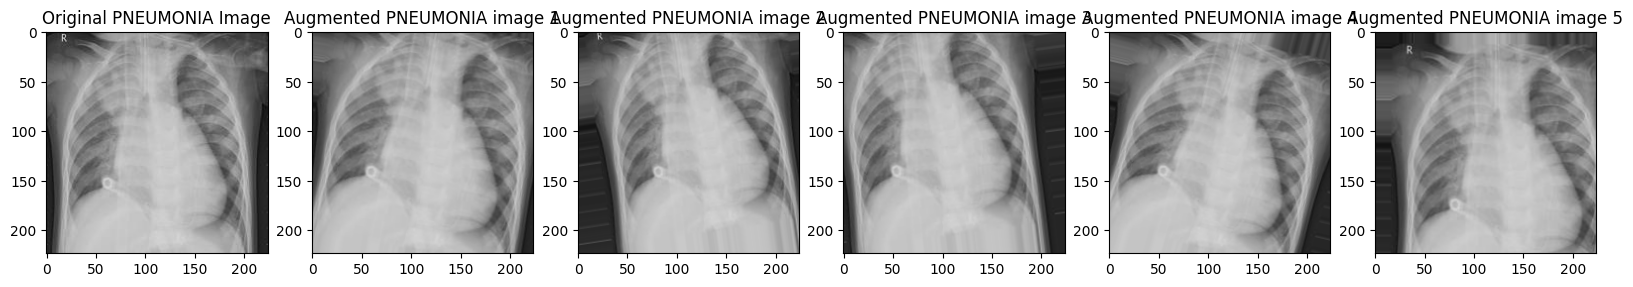

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define data augmentation with adjustments for Zalando Fashion Dataset
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,  # Reduced rotation
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    # horizontal_flip=True,  # Consider removing or keeping based on directionality
    zoom_range=0.1,  # Added zoom
    # shear_range=0.1, # Optional: Add shear cautiously
    fill_mode='nearest'
)

# Define your data paths and fashion categories
data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
categories = ['NORMAL', 'PNEUMONIA']

for category in categories:
    category_path = os.path.join(data_path, category)
    # Get one sample image from each category
    img_path = os.path.join(category_path, os.listdir(category_path)[0])

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    # Convert the image to RGB if it's not already
    img = img.convert('RGB')
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Use __next__() instead of next() and get the first item from the batch
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {category} Image")

    for i, aug_img in enumerate(augmented_imgs):
        # Rescale augmented image to 0-255 and convert to uint8
        aug_img = (aug_img * 255).astype('uint8')
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {category} image {i+1}")

    plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import os
import pandas as pd

# Create Precision and Recall metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)  # Use pre-created metric
    recall = recall_metric(y_true, y_pred)      # Use pre-created metric
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training and less GPU load
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained ResNet101V2 model without the top classification layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# Apply the output layer to the previous layer's output
output = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Calculate class weights
train_data_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/train'
categories = ['NORMAL', 'PNEUMONIA']
train_counts = {category: 0 for category in categories}

for category in categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

total_samples = sum(train_counts.values())
class_weights = {i: total_samples / count for i, count in enumerate(train_counts.values())}
print(class_weights)

{0: 3.889634601043997, 1: 1.3460645161290323}


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ cast[0][0]             │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)        

 Total params: 7,563,330 (28.85 MB)

 Trainable params: 525,826 (2.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2940s 324s/step - accuracy: 0.4510 - f1_score: 0.4875 - loss: 3.1578 - precision: 0.4510 - recall: 0.4510 - val_accuracy: 0.7500 - val_f1_score: 0.5005 - val_loss: 0.6590 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 2/30
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7578 - f1_score: 0.5258 - loss: 2.7242 - precision: 0.7578 - recall: 0.7578

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 777ms/step - accuracy: 0.7578 - f1_score: 0.5258 - loss: 2.7242 - precision: 0.7578 - recall: 0.7578 - val_accuracy: 0.8867 - val_f1_score: 0.5580 - val_loss: 0.2788 - val_precision: 0.8865 - val_recall: 0.8848
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.7009 - f1_score: 0.5856 - loss: 1.1867 - precision: 0.7009 - recall: 0.7003 - val_accuracy: 0.8965 - val_f1_score: 0.6403 - val_loss: 0.2088 - val_precision: 0.8982 - val_recall: 0.8965
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 784ms/step - accuracy: 0.8828 - f1_score: 0.6517 - loss: 0.7138 - precision: 0.8828 - recall: 0.8828 - val_accuracy: 0.9062 - val_f1_score: 0.6631 - val_loss: 0.2312 - val_precision: 0.9061 - val_recall: 0.9043
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.8403 - f1_score: 0.6782 - loss: 0.6183 - precision: 0.8403 - recall: 0.8403 - val_accuracy: 0.9355 - val_f1_score: 0.7213 - val_loss: 0.1694 - val_precision: 0.9355 - val_recall: 0.9355
Epoch 6/30
9/9 

In [ ]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 12s/step - accuracy: 0.9247 - f1_score: 0.8935 - loss: 0.1552 - precision: 0.9247 - recall: 0.9247
Test Accuracy: 92.51%


In [ ]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 343s 8s/step - accuracy: 0.7974 - f1_score: 0.8916 - loss: 2.3324 - precision: 0.7974 - recall: 0.7974 - val_accuracy: 0.8457 - val_f1_score: 0.8906 - val_loss: 0.6094 - val_precision: 0.8457 - val_recall: 0.8457
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 152s 788ms/step - accuracy: 0.8966 - f1_score: 0.8906 - loss: 0.4771 - precision: 0.8966 - recall: 0.8966 - val_accuracy: 0.8438 - val_f1_score: 0.8904 - val_loss: 0.6486 - val_precision: 0.8438 - val_recall: 0.8438
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.9131 - f1_score: 0.8907 - loss: 0.4081 - precision: 0.9131 - recall: 0.9131 - val_accuracy: 0.9043 - val_f1_score: 0.8921 - val_loss: 0.3750 - val_precision: 0.9043 - val_recall: 0.9043
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 773ms/step - accuracy: 0.9707 - f1_score: 0.8925 - loss: 0.2198 - precision: 0.9707 - recall: 0.9707 - val_accuracy: 0.9102 - val_f1_score: 0.8926 - val_loss: 0.3126 - val_precision: 0.9102 - val_recall: 0.9102
E

In [ ]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.9086 - f1_score: 0.9285 - loss: 0.3432 - precision: 0.9086 - recall: 0.9086
Test Accuracy: 90.79%


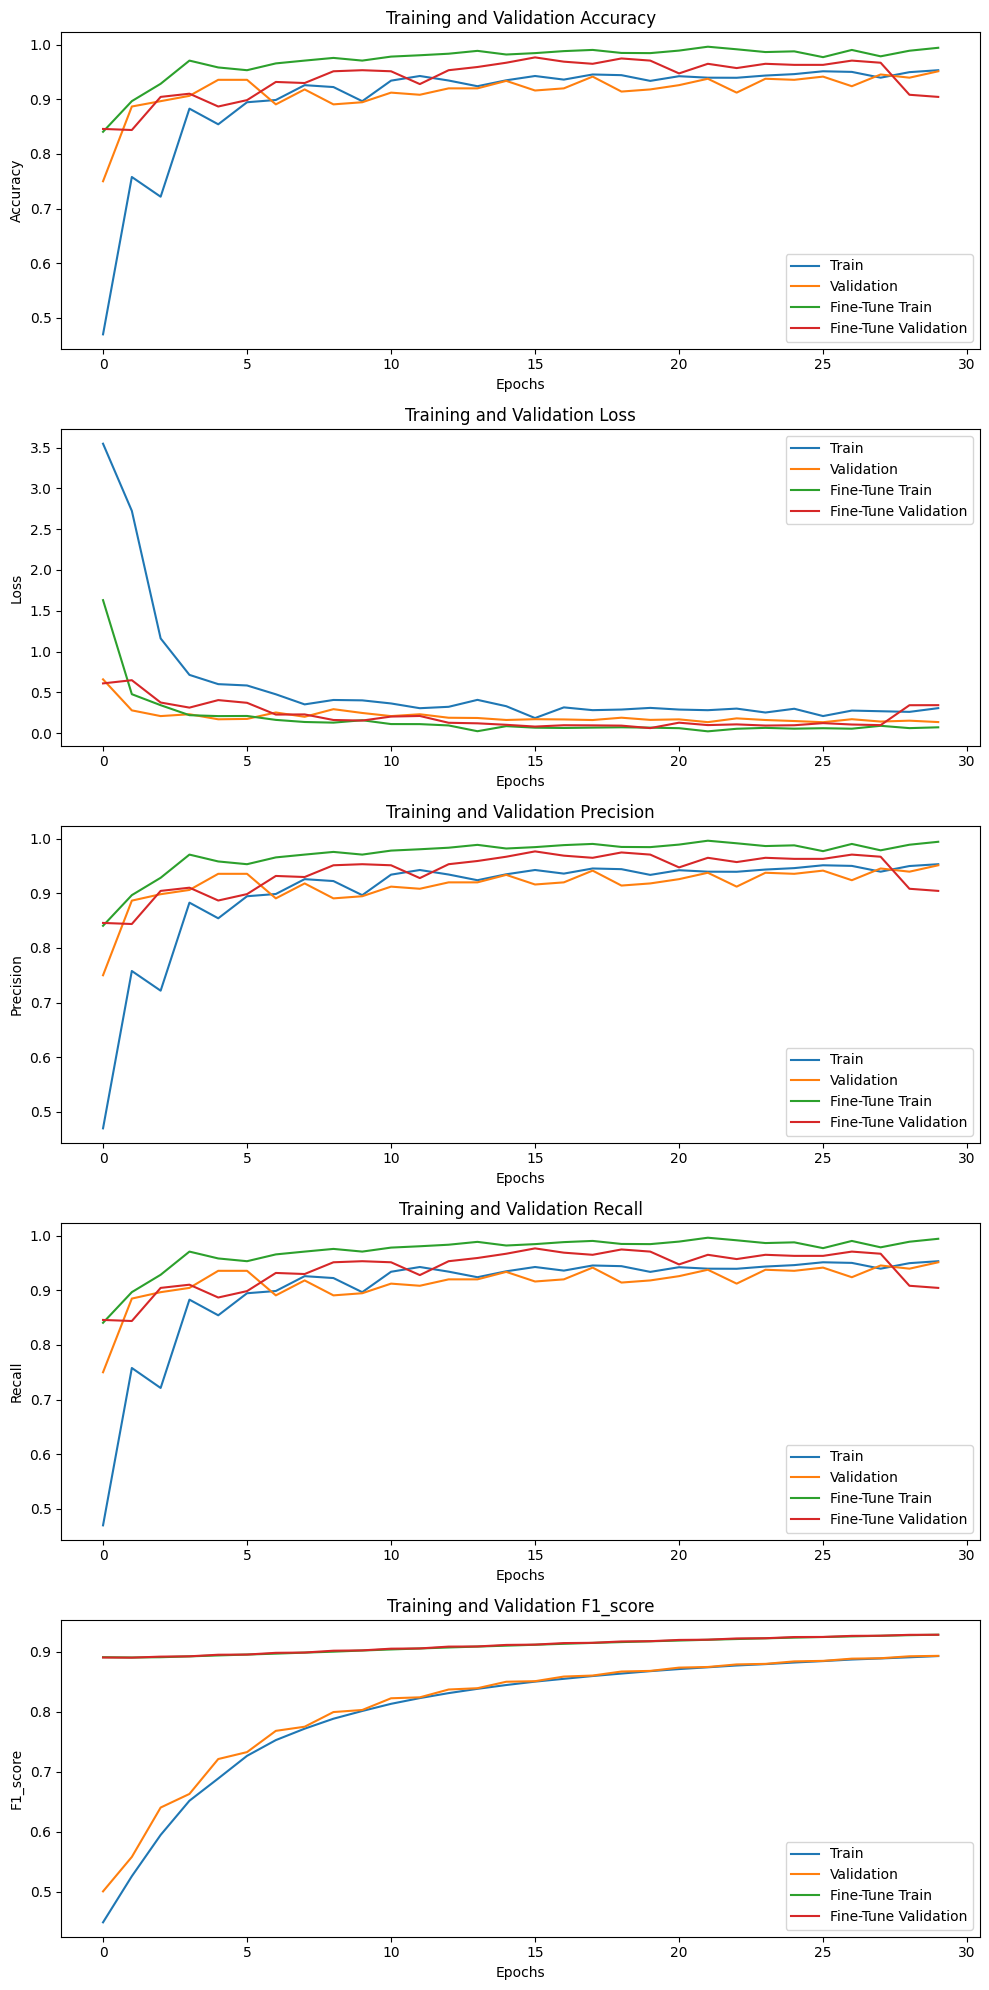

In [ ]:
import matplotlib.pyplot as plt

# Define metrics to plot
metrics = ['accuracy', 'loss', 'precision', 'recall', 'f1_score']

# Create a figure and subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 20))  # Adjust figsize as needed

# Loop through metrics and plot each one
for i, metric in enumerate(metrics):
    ax = axes[i]

    # Plot training and validation curves
    ax.plot(history.history[metric], label='Train')
    ax.plot(history.history['val_' + metric], label='Validation')
    ax.plot(fine_tune_history.history[metric], label='Fine-Tune Train')
    ax.plot(fine_tune_history.history['val_' + metric], label='Fine-Tune Validation')

    # Set labels and title
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())  # Capitalize metric name for title
    ax.set_title(f'Training and Validation {metric.capitalize()}')
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

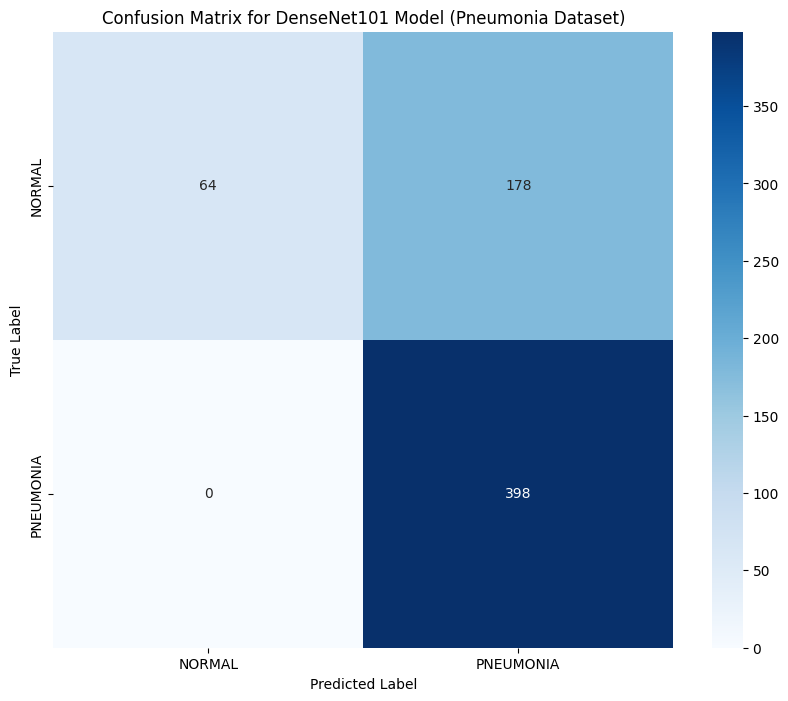

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import preprocess_input

# Define your Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Update the path to your Pneumonia test dataset
dataset_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Initialize empty lists to store all predicted and true categories
all_predicted_categories = []
all_true_categories = []

# Loop through each category (NORMAL, PNEUMONIA)
for category in categories:
    # Define the path to the category folder in the test dataset
    category_folder_path = os.path.join(dataset_path, category)

    # Get a list of all image files in the category folder
    image_files = [f for f in os.listdir(category_folder_path) if os.path.isfile(os.path.join(category_folder_path, f))]

    # Loop through each image file and make a prediction
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index and category label
        predicted_class_index = np.argmax(prediction)
        predicted_category = categories[predicted_class_index]

        # Append the predicted and true categories to the lists
        all_predicted_categories.append(predicted_category)
        all_true_categories.append(category)  # True category is the current category

# Convert the lists to NumPy arrays
all_predicted_categories = np.array(all_predicted_categories)
all_true_categories = np.array(all_true_categories)

# Create the confusion matrix
cm_all_categories = confusion_matrix(all_true_categories, all_predicted_categories, labels=categories)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_all_categories, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix for DenseNet101 Model (Pneumonia Dataset)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

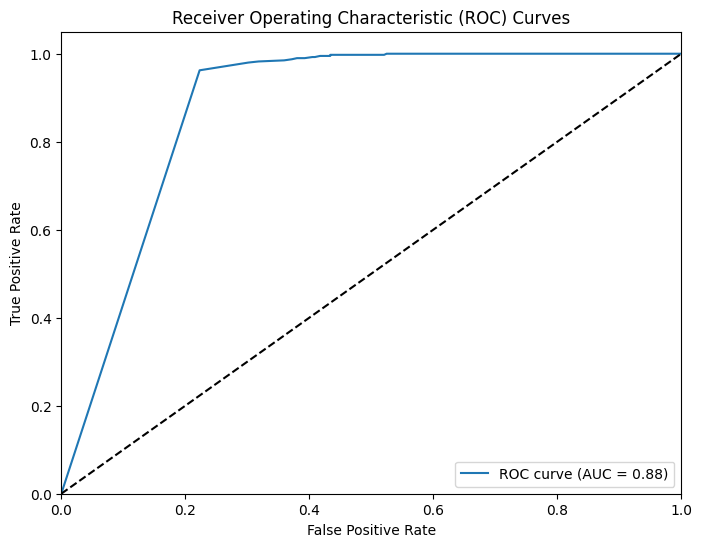

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.applications.densenet import preprocess_input  # Import DenseNet's preprocessing
import matplotlib.pyplot as plt

# Define your Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Initialize lists to store true and predicted probabilities
true_labels = []
predicted_probabilities = []

# Loop through each category folder in the test dataset
for category_index, category in enumerate(categories):
    category_folder_path = os.path.join(test_folder_path, category)

    # Loop through images in the category folder
    for image_file in os.listdir(category_folder_path):
        img_path = os.path.join(category_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Apply DenseNet's preprocessing

        # Make prediction (get probabilities)
        prediction = model.predict(img_array)[0]  # Get probabilities for both classes

        # Append true label (one-hot encoded) and predicted probabilities
        true_label = np.zeros(len(categories))
        true_label[category_index] = 1  # One-hot encoding
        true_labels.append(true_label)
        predicted_probabilities.append(prediction)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Plot ROC curve for the 'PNEUMONIA' class (class index 1)
fpr, tpr, _ = roc_curve(true_labels[:, 1], predicted_probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_DenseNet121.h5')

In [ ]:
!pip install tf_keras_vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import preprocess_input

# Define Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Define Grad-CAM function
def grad_cam_heatmap(model, image, layer_name='conv5_block16_concat'):  # Adjust layer name if needed
    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Loop through each category folder in the test dataset
for category in categories:
    print(f"Processing category: {category}")
    category_folder_path = os.path.join(test_folder_path, category)

    # Get a list of image files in the category folder
    image_files = os.listdir(category_folder_path)

    # Visualize heatmaps for a few images (e.g., 3)
    for image_file in image_files[:3]:  # Adjust the number of images to visualize
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Apply DenseNet's preprocessing

        # Generate heatmap
        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display original image and heatmap
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tf_keras_vis.gradcam import GradcamPlusPlus
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import preprocess_input  # Import DenseNet's preprocessing

# Define Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Define Grad-CAM++ function and visualize heatmaps
def grad_cam_plusplus_heatmap(model, image, layer_name='conv5_block16_concat'):  # Change layer name for DenseNet
    gradcam_plusplus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plusplus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Loop through each category folder in the test dataset
for category in categories:
    print(f"Processing category: {category}")
    category_folder_path = os.path.join(test_folder_path, category)

    # Get a list of image files in the category folder
    image_files = os.listdir(category_folder_path)

    # Visualize heatmaps for a few images (e.g., 3)
    for image_file in image_files[:3]:  # Adjust the number of images to visualize
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Apply DenseNet's preprocessing

        # Generate Grad-CAM++ heatmap
        heatmap = grad_cam_plusplus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display original image and heatmap
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on original image
        predicted_category = categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.densenet import preprocess_input

# Define your Pneumonia categories
categories = ['NORMAL', 'PNEUMONIA']

# Path to your Pneumonia test dataset
test_folder_path = '/content/drive/My Drive/Pneumonia_Detection_Project/Pneumonia_Dataset/test'

# Define Score-CAM function
def scorecam_heatmap(model, image, layer_name='conv5_block16_concat'):  # Adjust layer name if needed
    scorecam = Scorecam(model)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = scorecam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Loop through each category folder in the test dataset
for category in categories:
    print(f"Processing category: {category}")
    category_folder_path = os.path.join(test_folder_path, category)

    # Get a list of image files in the category folder
    image_files = os.listdir(category_folder_path)

    # Visualize heatmaps for a few images (e.g., 3)
    for image_file in image_files[:3]:  # Adjust the number of images to visualize
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Apply DenseNet's preprocessing

        # Generate Score-CAM heatmap
        heatmap = scorecam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        # Display original image and heatmap
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title(f"Original Image: {category}")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap on original image
        predicted_category = categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

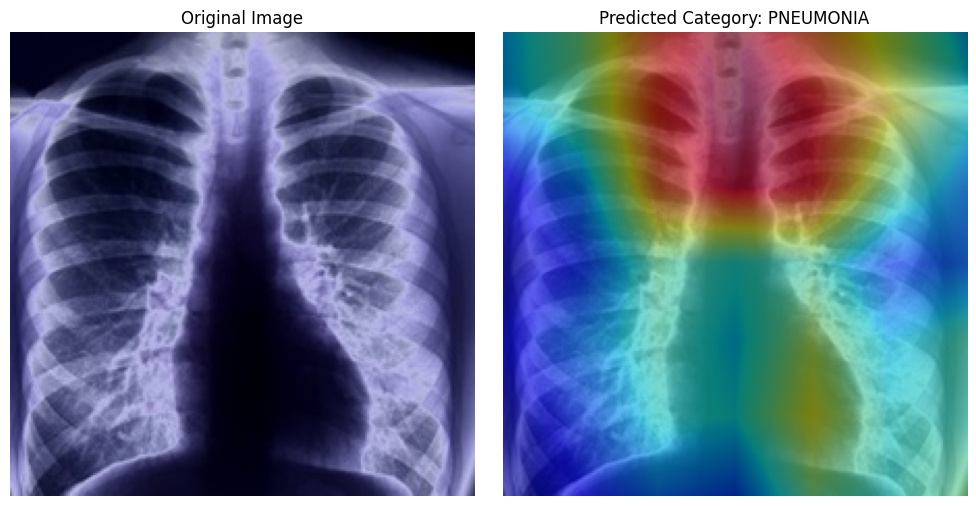

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

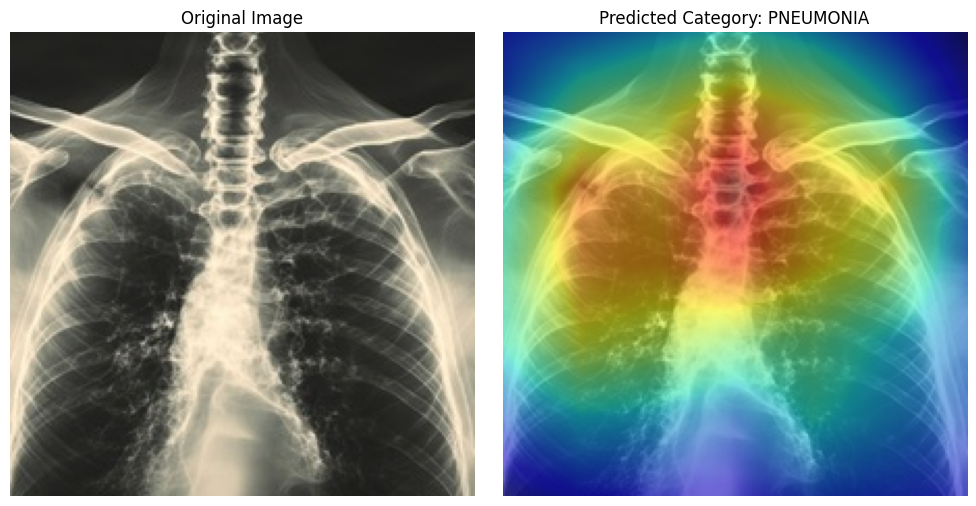

In [ ]:
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.densenet import preprocess_input

# Define paths to your two specific images
image_path_1 = '/content/drive/My Drive/Pneumonia_Detection_Project/pneumonia_kid.jpg'
image_path_2 = '/content/drive/My Drive/Pneumonia_Detection_Project/xray_1.jpg'

# Define Score-CAM function (same as before)
def scorecam_heatmap(model, image, layer_name='conv5_block16_concat'):
    scorecam = Scorecam(model)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = scorecam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Process the two specific images
for img_path in [image_path_1, image_path_2]:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Generate Score-CAM heatmap
    heatmap = scorecam_heatmap(model, x)
    heatmap = np.uint8(255 * heatmap[0])

    # Display original image and heatmap
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(img)
    axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
    predicted_category = categories[np.argmax(model.predict(x))]  # Assuming 'categories' is defined
    axes[1].set_title(f"Predicted Category: {predicted_category}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()